In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [12]:
# Generate data
xVals = []
yVals = []
wVals = []

for i in range(1000):
    xVals.append(random.random())
    yVals.append(random.random())
    wVals.append(random.random())

# Convert Python lists to NumPy arrays so math is element-wise
xVals = np.array(xVals)
yVals = np.array(yVals)
wVals = np.array(wVals)

# Double x → changes its distribution from uniform to triangular
xVals = xVals + xVals

# z is the sum of two independent random variables
zVals = xVals + yVals

# t is the sum of three independent random variables
tVals = xVals + yVals + wVals



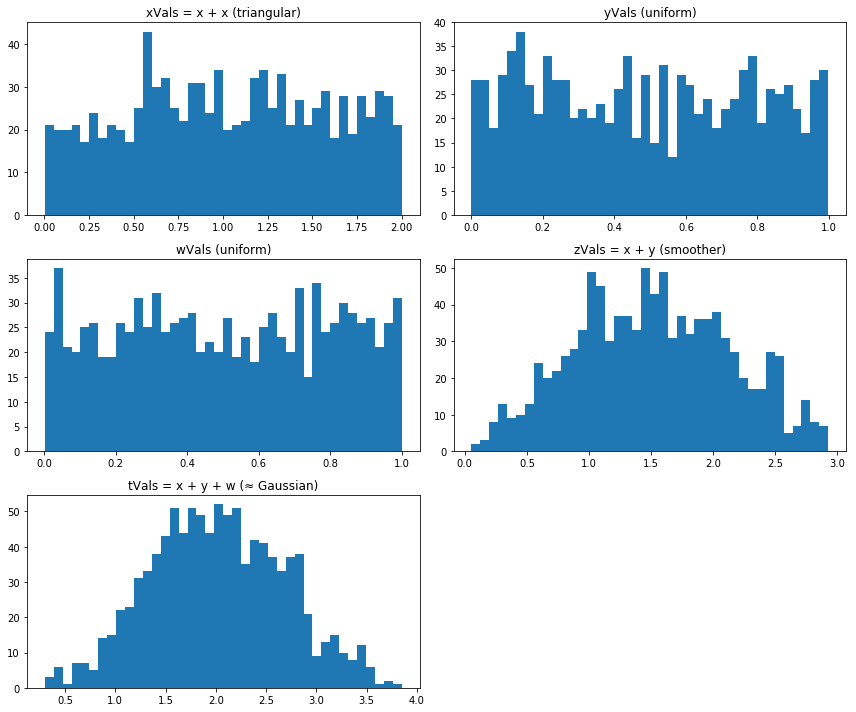

In [13]:
plt.figure(figsize=(12, 10))

# xVals (x + x)
plt.subplot(3, 2, 1)
plt.hist(xVals, bins=40)
plt.title("xVals = x + x (triangular)")

# yVals
plt.subplot(3, 2, 2)
plt.hist(yVals, bins=40)
plt.title("yVals (uniform)")

# wVals
plt.subplot(3, 2, 3)
plt.hist(wVals, bins=40)
plt.title("wVals (uniform)")

# zVals = x + y
plt.subplot(3, 2, 4)
plt.hist(zVals, bins=40)
plt.title("zVals = x + y (smoother)")

# tVals = x + y + w
plt.subplot(3, 2, 5)
plt.hist(tVals, bins=40)
plt.title("tVals = x + y + w (≈ Gaussian)")

plt.tight_layout()
plt.show()



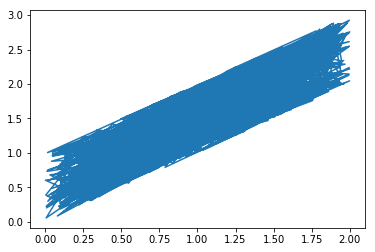

In [14]:
plt.plot(xVals, zVals)
plt.show()

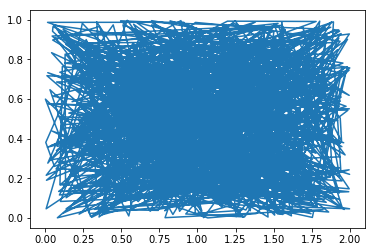

In [15]:
plt.plot(xVals, yVals)

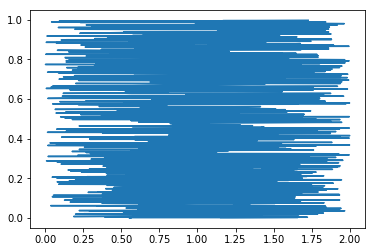

In [16]:
plt.plot(xVals, sorted(yVals))

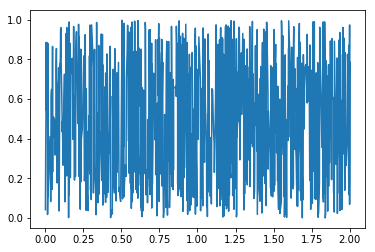

In [17]:
plt.plot(sorted(xVals), yVals)

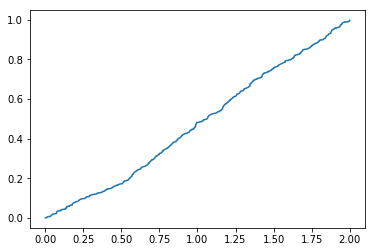

In [18]:
plt.plot(sorted(xVals), sorted(yVals))

In [19]:
def drawing_without_replacement_sim(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    4 red and 4 green balls. Balls are not replaced once
    drawn. Returns a float - the fraction of times 3
    balls of the same color were drawn in the first 3 draws.
    '''
    success = 0
    for _ in range(numTrials):
        bucket = ['R', 'R', 'R','R', 'G', 'G', 'G', 'G']
        draw = random.sample(bucket, 3) #draw 3 without replacement
        if draw[0] == draw[1] == draw[2]:
            success += 1
    return success / numTrials

print(drawing_without_replacement_sim(100))
print(drawing_without_replacement_sim(1000))
print(drawing_without_replacement_sim(10000))
print(drawing_without_replacement_sim(50000))

0.13
0.149
0.1439
0.14264


In [20]:
import pylab
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a list of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axes
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    pylab.hist(values, bins = numBins)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    if title is not None:
        pylab.title(title)
    pylab.show()

In [21]:
class Die(object):
    def __init__(self, sides):
        self.sides = sides

    def roll(self):
        return random.choice(self.sides)


def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls.
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated to 3 decimal places
    """
    longestRuns = []

    for _ in range(numTrials):
        rolls = [die.roll() for _ in range(numRolls)]

        maxRun = 1
        currentRun = 1

        for i in range(1, len(rolls)):
            if rolls[i] == rolls[i - 1]:
                currentRun += 1
                maxRun = max(maxRun, currentRun)
            else:
                currentRun = 1

        longestRuns.append(maxRun)

    makeHistogram(
        longestRuns,
        numBins=10,
        xLabel="Length of Longest Run",
        yLabel="Frequency",
        title="Longest Run Lengths"
    )

    return round(sum(longestRuns) / float(len(longestRuns)), 3)

3.28


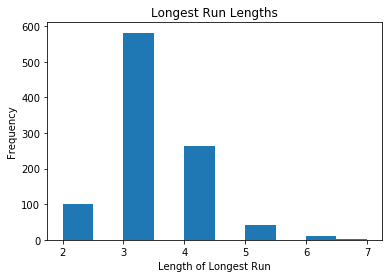

In [23]:
die = Die([1, 2, 3, 4, 5, 6])
result = getAverage(die, numRolls=100, numTrials=1000)
print(result)


In [29]:
def find_combination(choices, total):
    """
    choices: a non-empty list of ints
    total: a positive int

    Returns result, a numpy.array of length len(choices)
    such that
        * each element of result is 0 or 1
        * sum(result*choices) == total
        * sum(result) is as small as possible
    In case of ties, returns any result that works.
    If there is no result that gives the exact total,
    pick the one that gives sum(result*choices) closest
    to total without going over.
    """
    choices = np.array(choices)
    n = len(choices)

    best_exact = None
    best_exact_count = float('inf')

    best_under = None
    best_under_sum = -1
    best_under_count = float('inf')

    for bits in itertools.product([0, 1], repeat=n):
        bits = np.array(bits, dtype=int)
        s = int(np.sum(bits * choices))
        c = int(np.sum(bits))

        if s > total:
            continue

        if s == total:
            # pick exact with smallest number of items
            if c < best_exact_count:
                best_exact = bits
                best_exact_count = c
        else:
            # otherwise pick closest under total; tie-break by fewer items
            if (s > best_under_sum) or (s == best_under_sum and c < best_under_count):
                best_under = bits
                best_under_sum = s
                best_under_count = c

    return best_exact if best_exact is not None else best_under


In [30]:
print(find_combination([1,2,2,3], 4))
#output is incorrect can be only return either [0 1 1 0] or [1 0 0 1]

[0 1 1 0]


In [31]:
print(find_combination([1,1,3,5,3], 5))
#output is incorrect can only be you should return [0 0 0 1 0]

[0 0 0 1 0]


In [28]:
print(find_combination([1,1,1,9], 4))
#output should be you should return [1 1 1 0] is correct

[1 1 1 0]
